In [1]:
import jieba
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
import jieba.posseg as pseg
from wordcloud import WordCloud
#设置显示风格
plt.style.use('fivethirtyeight')

#分别读取训练集和测试集
train_data=pd.read_csv('train.tsv',sep='\t')
test_data=pd.read_csv('dev.tsv',sep='\t')
#print(train_data['sentence'])

D:\lianxiang\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


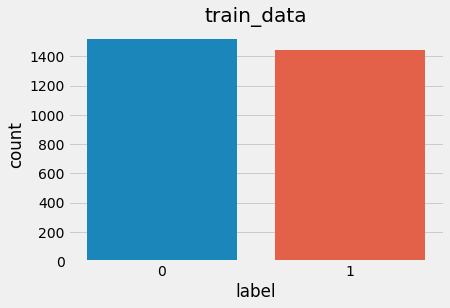

D:\lianxiang\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


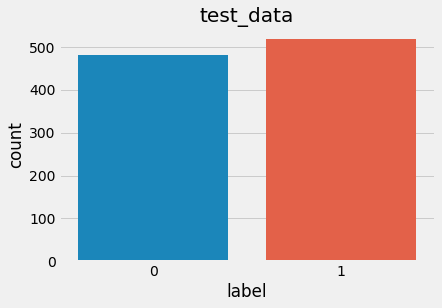

In [2]:
#获取训练数据标签数量分布
sns.countplot('label',data=train_data)
plt.title('train_data')
plt.show()

sns.countplot('label',data=test_data)
plt.title('test_data')
plt.show()

D:\lianxiang\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


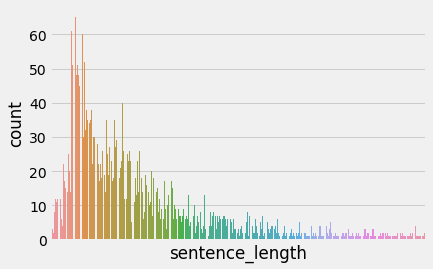

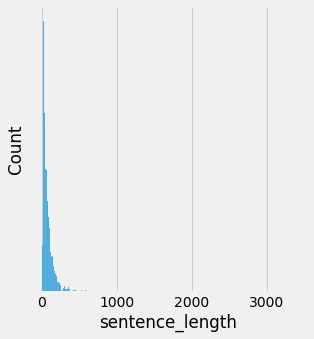

D:\lianxiang\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


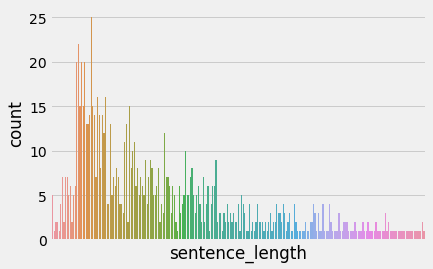

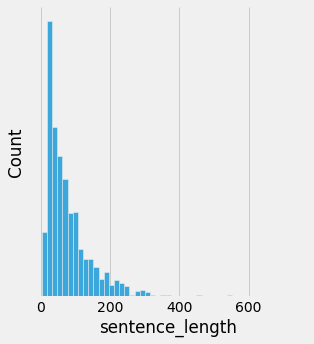

In [4]:
#在训练数据中增加新的句子长度列,每个元素的值都是对应句子列的长度。
train_data['sentence_length']=list(map(lambda x:len(x),train_data['sentence']))
#绘制句子长度列的数量分布图
sns.countplot('sentence_length',data=train_data)
#主要关注count长度分布的纵坐标，不需要绘制横坐标，横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()
#绘制dist长度分布图
sns.displot(train_data['sentence_length'])
#主要关注dist长度分布横坐标，不需要绘制纵坐标
plt.yticks([])
plt.show()

test_data['sentence_length']=list(map(lambda x:len(x),test_data['sentence']))
#绘制句子长度列的数量分布图
sns.countplot('sentence_length',data=test_data)
#主要关注count长度分布的纵坐标，不需要绘制横坐标，横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()
#绘制dist长度分布图
sns.displot(test_data['sentence_length'])
#主要关注dist长度分布横坐标，不需要绘制纵坐标
plt.yticks([])
plt.show()


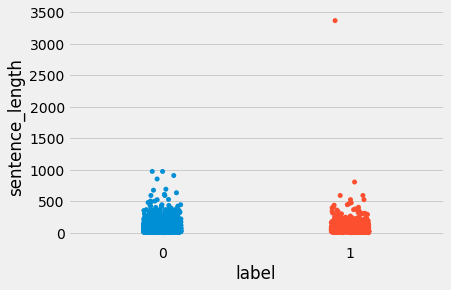

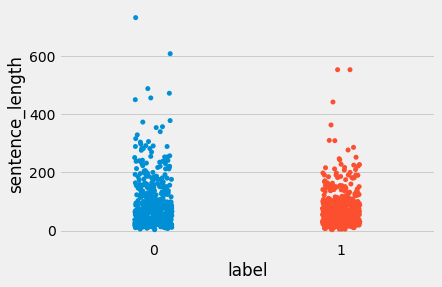

In [5]:
#获取训练集和测试集的正负样本长度散点分布
sns.stripplot(y='sentence_length',x='label',data=train_data)
plt.show()
sns.stripplot(y='sentence_length',x='label',data=test_data)
plt.show()

In [6]:
#对训练集的句子进行分词，并统计出不同词汇的总数
train_vocab=set(chain(*map(lambda x:jieba.lcut(x),train_data['sentence'])))
print(f'训练集共包含不同词汇总数为{len(train_vocab)}')
#对测试集的句子进行分词，并统计出不同词汇的总数
test_vocab=set(chain(*map(lambda x:jieba.lcut(x),test_data['sentence'])))
print(f'训练集共包含不同词汇总数为{len(test_vocab)}')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\loneve\AppData\Local\Temp\jieba.cache
Loading model cost 1.052 seconds.
Prefix dict has been built successfully.


训练集共包含不同词汇总数为12162
训练集共包含不同词汇总数为6857


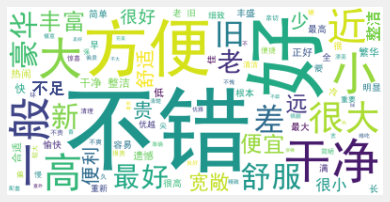

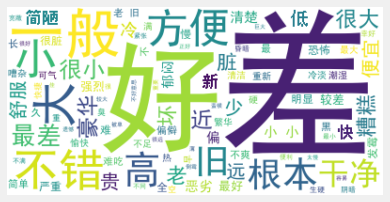

In [9]:
def get_a_list(text):
    """用于获取形容词列表"""
    # 使用jieba的词性标注方法切分文本,获得具有词性属性flag和词汇属性word的对象,
    # 从而判断flag是否为形容词,来返回对应的词汇
    r = []
    for g in pseg.lcut(text):
        if g.flag == "a":
            r.append(g.word)
    return r

# 导入绘制词云的工具包
from wordcloud import WordCloud

def get_word_cloud(keywords_list):
    # 实例化绘制词云的类, 其中参数font_path是字体路径, 为了能够显示中文,
    # max_words指词云图像最多显示多少个词, background_color为背景颜色
    wordcloud = WordCloud(font_path="./SimHei.ttf", max_words=100, background_color="white")
    # 将传入的列表转化成词云生成器需要的字符串形式
    keywords_string = " ".join(keywords_list)
    # 生成词云
    wordcloud.generate(keywords_string)

    # 绘制图像并显示
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# 获得训练集上正样本
p_train_data = train_data[train_data["label"]==1]["sentence"]

# 对正样本的每个句子的形容词
train_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_train_data))
#print(train_p_n_vocab)

# 获得训练集上负样本
n_train_data = train_data[train_data["label"]==0]["sentence"]

# 获取负样本的每个句子的形容词
train_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_train_data))

# 调用绘制词云函数
get_word_cloud(train_p_a_vocab)
get_word_cloud(train_n_a_vocab)

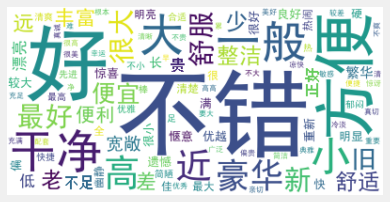

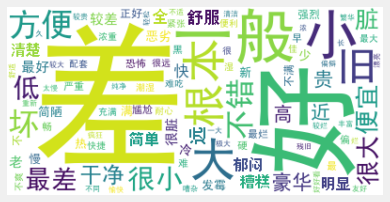

In [10]:
# 获得测试集上正样本
p_test_data = test_data[test_data["label"]==1]["sentence"]

# 对正样本的每个句子的形容词
test_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_test_data))
#print(test_p_n_vocab)

# 获得测试集上负样本
n_test_data = test_data[test_data["label"]==0]["sentence"]

# 获取负样本的每个句子的形容词
test_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_test_data))

# 调用绘制词云函数
get_word_cloud(test_p_a_vocab)
get_word_cloud(test_n_a_vocab)